 Projet Analyse de données


**Chargement des données et structure Data.frame**                         
Lancez Jupyter, créez un nouveau ficher et modifiez le répertoire par défaut.
Importez la librairie Pandas.
Importez le fichier  dans un Data.frame.



In [ ]:
#librairie pandas
import pandas as pd
import numpy as np

#chargement de la première feuille de données,
#première ligne avec noms des variables
#et première colonne identifiant des individus
X = pd.read_csv("country_wise_latest.csv")

#affichage des données
print(X)

         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

**Description des données**


In [ ]:
#dimension
print(X.shape)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(n)
print(p)


#description des données
print(X.head())
#statistiques selon l'espèce


(187, 15)
187
15
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526      

**Graphiques**                           

array([[<Axes: title={'center': 'Africa'}>,
        <Axes: title={'center': 'Americas'}>],
       [<Axes: title={'center': 'Eastern Mediterranean'}>,
        <Axes: title={'center': 'Europe'}>],
       [<Axes: title={'center': 'South-East Asia'}>,
        <Axes: title={'center': 'Western Pacific'}>]], dtype=object)

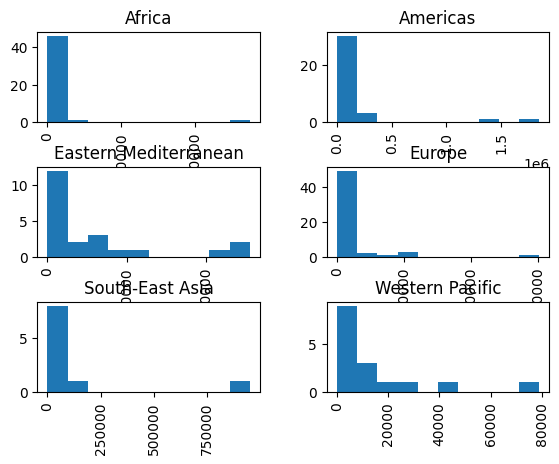

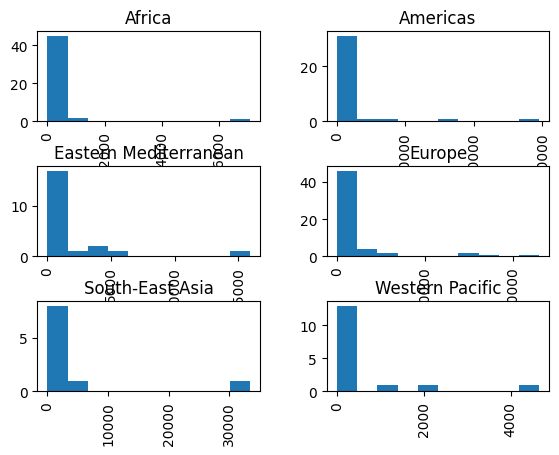

In [ ]:
#scree plot
import matplotlib.pyplot as plt
#histogramme de la variable Recovered
X.hist(column='Recovered',by='WHO Region')
#histogramme de la variable Deaths
X.hist(column='Deaths',by='WHO Region')



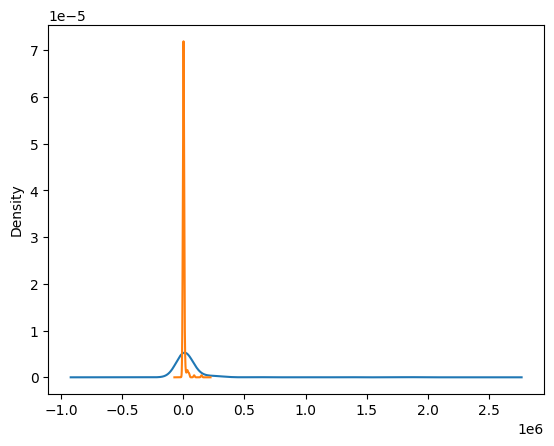

In [ ]:
import matplotlib.pyplot as plt

#density plot pour la variable Recovered
X['Recovered'].plot(kind='density')
#density plot pour la variable SE_L
X['Deaths'].plot(kind='density')

plt.show()



Comparer les distributions des différentes espèces avec un boxplot.

<Axes: title={'center': 'Recovered'}, xlabel='WHO Region'>

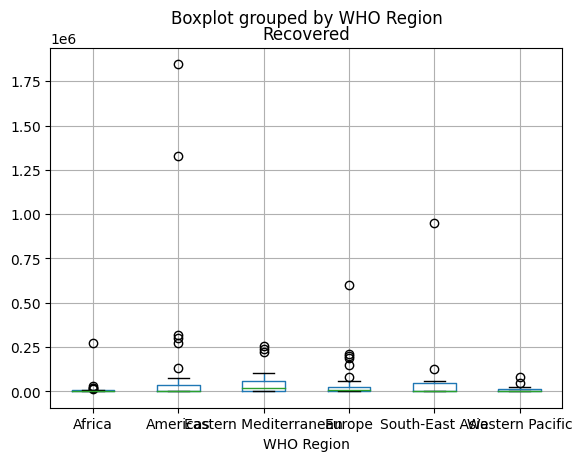

In [ ]:
#comparaison des distributions avec un boxplot
X.boxplot(column='Recovered',by='WHO Region')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
X1 = pd.DataFrame(X)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
X1['Country/Region'] = label_encoder.fit_transform(X1['Country/Region'])
X1['WHO Region'] = label_encoder.fit_transform(X1['WHO Region'])




print(X1)

     Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0                 0      36263    1269      25198    9796        106   
1                 1       4880     144       2745    1991        117   
2                 2      27973    1163      18837    7973        616   
3                 3        907      52        803      52         10   
4                 4        950      41        242     667         18   
..              ...        ...     ...        ...     ...        ...   
182             182      10621      78       3752    6791        152   
183             183         10       1          8       1          0   
184             184       1691     483        833     375         10   
185             185       4552     140       2815    1597         71   
186             186       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50        

In [ ]:
#scikit-learn
import sklearn
from sklearn.preprocessing import RobustScaler
#classe StandardScaler pour standardisation (centrage et reduction)
#from sklearn.preprocessing import StandardScaler
X1.replace([np.inf, -np.inf], np.nan, inplace=True)
median = X1.median()
X1.fillna(median, inplace=True)
sc = StandardScaler()
scaler = RobustScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X1)
print(Z)

[[-1.72281314 -0.13567609 -0.15847524 ... -0.18392586 -0.47194
   0.02369412]
 [-1.70428826 -0.21776771 -0.23847666 ... -0.18451702  0.13883844
   0.65666574]
 [-1.68576339 -0.15736107 -0.16601315 ... -0.10907995  0.18261158
  -1.24224911]
 ...
 [ 1.68576339 -0.2261095  -0.21436957 ... -0.19796606 -0.37457546
   0.02369412]
 [ 1.70428826 -0.21862569 -0.23876111 ... -0.17360156  0.95130059
  -1.24224911]
 [ 1.72281314 -0.22345969 -0.24615679 ... -0.17856313  1.80999045
  -1.24224911]]


Tracer le nuage de points individus pour deux variables. Tracer la matrice des nuages de points individus pour toutes les variables deux à deux.

<Axes: xlabel='Recovered', ylabel='Deaths'>

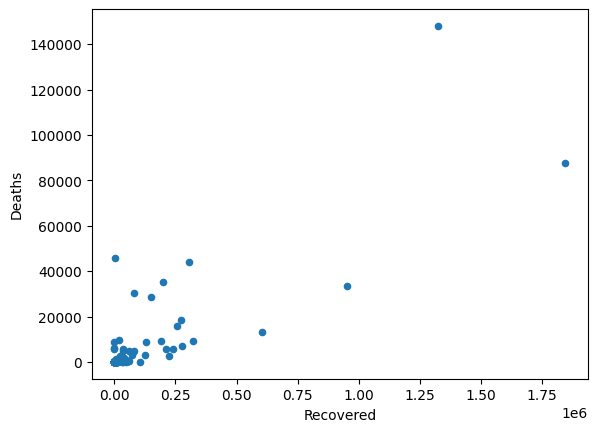

In [ ]:
#nuage de point pour les deux variables Recovered et Deaths
X1.plot.scatter(x='Recovered',y='Deaths')
#pd.plotting.scatter_matrix(X1,hist_kwds={'bins':30})
#pd.plotting.scatter_matrix(X1,diagonal='kde')



 Calculer la matrice de corrélation et confirmer les résultats de la question précédente.


In [ ]:
# Calculer la matrice de corrélation


corr=X1.corr()
print(corr)

                        Country/Region  Confirmed    Deaths  Recovered  \
Country/Region                1.000000   0.057151  0.066606   0.004157   
Confirmed                     0.057151   1.000000  0.934698   0.906377   
Deaths                        0.066606   0.934698  1.000000   0.832098   
Recovered                     0.004157   0.906377  0.832098   1.000000   
Active                        0.094585   0.927018  0.871586   0.682103   
New cases                     0.032091   0.909720  0.806975   0.818942   
New deaths                    0.022273   0.871683  0.814161   0.820338   
New recovered                -0.008903   0.859252  0.765114   0.919203   
Deaths / 100 Cases            0.052931   0.063550  0.251565   0.048438   
Recovered / 100 Cases        -0.038300  -0.064815 -0.114529   0.026610   
Deaths / 100 Recovered        0.108756   0.025175  0.169006  -0.027277   
Confirmed last week           0.061760   0.999127  0.939082   0.899312   
1 week change                 0.021385

Calculer et afficher les valeurs et vecteurs propres de la matrice de corrélation.

In [ ]:
# Calculer les valeurs et les vecteurs propres
eig_vals, eig_vecs = np.linalg.eig(corr)
print(eig_vals)
print(eig_vecs)
diagonal_matrix=np.diag(eig_vals)
print(diagonal_matrix)


[ 8.01733742e+00  1.63615818e+00  1.42510887e+00  1.00699245e+00
  9.22191200e-01  6.50527389e-01  4.88158915e-01  4.11679145e-01
  2.60123895e-01  1.13952240e-01  4.69233303e-02  1.62659209e-02
  4.58103931e-03 -5.88951584e-13 -1.00789325e-16]
[[ 1.71134661e-02 -1.59574609e-01 -2.22445515e-01  7.40579304e-01
  -5.81244020e-01  1.42674715e-01 -1.16016190e-01  6.48558535e-02
  -1.64176583e-02 -2.00115081e-03  1.16123175e-02 -1.88419846e-03
  -4.96967017e-03 -5.39225731e-08 -7.78860450e-14]
 [ 3.48162905e-01  8.52645135e-03 -1.68872349e-02  1.49127133e-02
  -1.52368109e-02 -3.06087502e-02  1.19388359e-01 -1.50387734e-01
  -1.69082669e-01  7.28258250e-02 -2.18138517e-01  4.03972683e-02
   6.11431071e-02  8.04017345e-01 -3.27131025e-01]
 [ 3.26526761e-01 -1.26268270e-01 -1.16558994e-01 -4.73968632e-02
   6.36069195e-03  3.14227987e-02  1.20780127e-01 -2.62299396e-01
  -2.54431859e-01 -4.31246261e-01  6.94848167e-01 -2.02350798e-01
  -3.69522385e-02 -2.92986529e-02 -2.22376210e-02]
 [ 3.237

Que représente chaque valeur propre?
Calculer le pourcentage de variance expliquée par chacun des axes factoriels. En déduire la dimension du s.e.v de projection. Dites pourquoi ce résultat était prévisible?

In [ ]:
# Calcul du pourcentage de variance expliquée par chacun des axes factoriels
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(pd.DataFrame({'valprop':eig_vals,'inertie':var_exp,'inertiecum':cum_var_exp}))

         valprop       inertie  inertiecum
0   8.017337e+00  5.344892e+01   53.448916
1   1.636158e+00  1.090772e+01   64.356637
2   1.425109e+00  9.500726e+00   73.857363
3   1.006992e+00  6.713283e+00   80.570646
4   9.221912e-01  6.147941e+00   86.718588
5   6.505274e-01  4.336849e+00   91.055437
6   4.881589e-01  3.254393e+00   94.309830
7   4.116791e-01  2.744528e+00   97.054357
8   2.601239e-01  1.734159e+00   98.788516
9   1.139522e-01  7.596816e-01   99.548198
10  4.692333e-02  3.128222e-01   99.861020
11  1.626592e-02  1.084395e-01   99.969460
12  4.581039e-03  3.054026e-02  100.000000
13 -5.889516e-13 -6.719288e-16  100.000000
14 -1.007893e-16 -3.926344e-12  100.000000


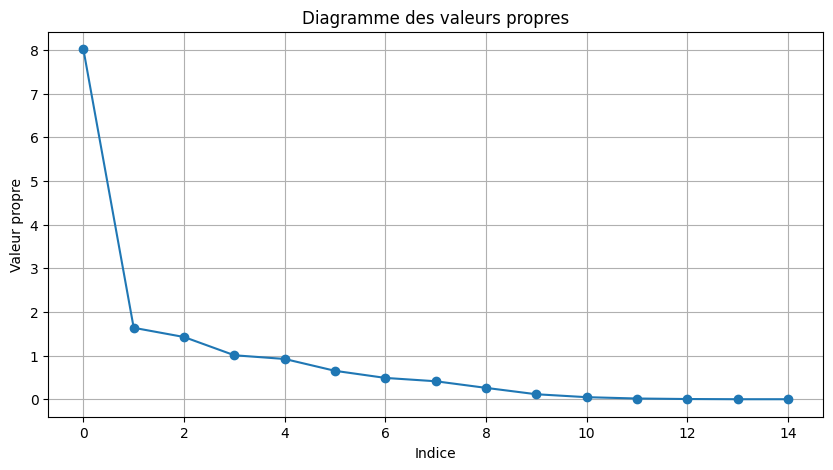

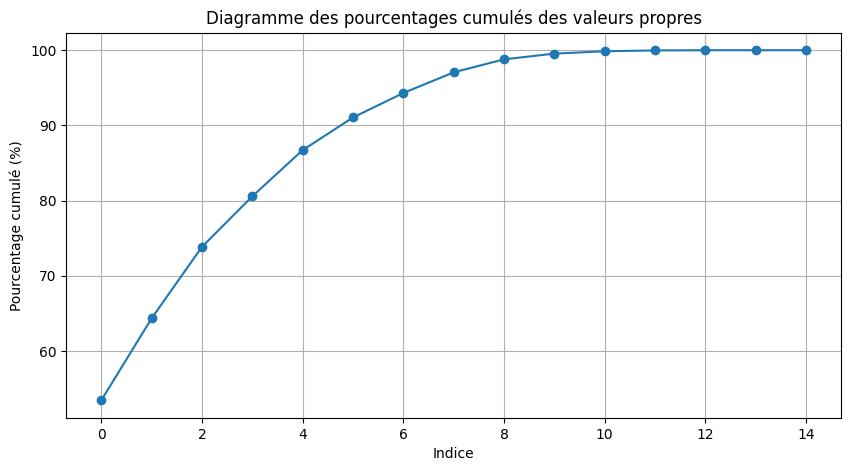

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Diagramme des valeurs propres
plt.figure(figsize=(10, 5))
plt.plot(eig_vals, '-o')
plt.title('Diagramme des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Valeur propre')
plt.grid(True)
plt.show()

# Calcul des pourcentages cumulés
cumulative_percentages = np.cumsum(eig_vals) / np.sum(eig_vals) * 100

# Diagramme des pourcentages cumulés
plt.figure(figsize=(10, 5))
plt.plot(cumulative_percentages, '-o')
plt.title('Diagramme des pourcentages cumulés des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Pourcentage cumulé (%)')
plt.grid(True)
plt.show()

Coordonnées des individus dans le nouveau repère (Tp) :
[[-5.08435821e-01  4.56231115e-01 -1.57140600e-02]
 [-6.45845772e-01  1.77560409e-01  3.68116481e-01]
 [-4.14891571e-01  1.37313177e-02  8.55754128e-01]
 [-7.06741852e-01  6.61021279e-01 -7.82238266e-01]
 [-6.24209232e-01 -1.08072293e+00  1.62151955e+00]
 [-7.02556209e-01  3.90604082e-01  4.23238287e-01]
 [ 9.82204563e-01 -1.25195410e-01  1.53393604e+00]
 [-5.24426424e-01  7.43795206e-01 -7.68208265e-03]
 [-6.03685144e-01  6.36661626e-01  1.46063707e-01]
 [-6.23882800e-01  9.40660100e-01 -5.15055751e-01]
 [-5.15151859e-01  9.07643132e-01  3.75604191e-02]
 [-6.31751933e-01 -1.69432668e+00  3.87384204e+00]
 [-5.34181837e-01  1.32097624e+00  1.28535043e-01]
 [ 6.73664205e-01  5.99512814e-01  7.82285401e-02]
 [-6.87468916e-01  2.90238249e-01 -3.23554469e-01]
 [-4.67472474e-01  1.35293745e+00 -3.15605312e-01]
 [-7.21398195e-02 -2.15284543e+00 -1.11291294e+00]
 [-6.69031805e-01 -2.85968416e-01  7.65650985e-01]
 [-6.80106678e-01  1.04493

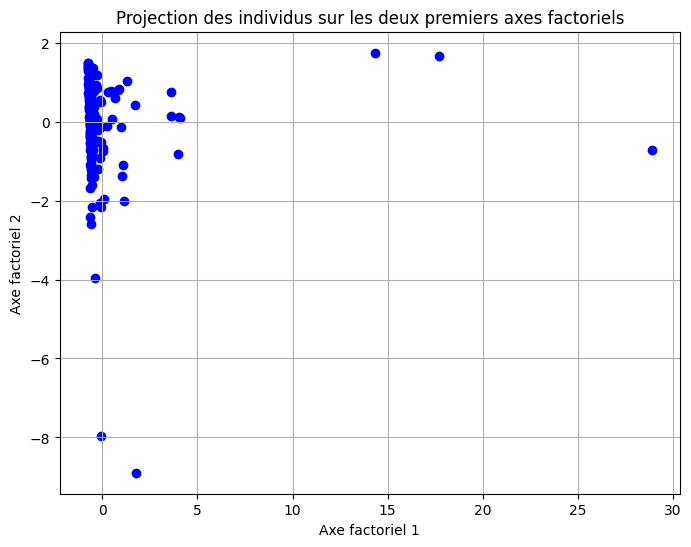

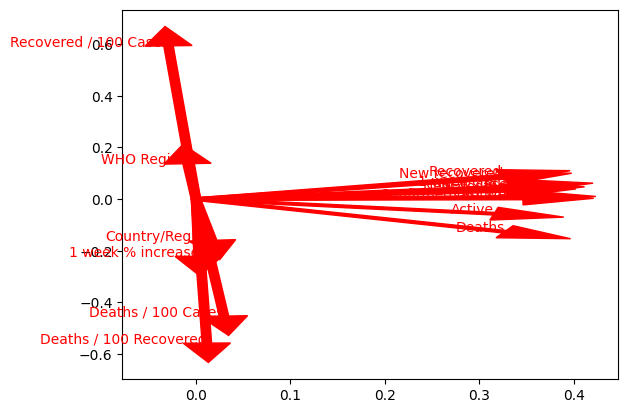

In [ ]:
selected_eigenvectors = eig_vecs[:, :2]


Tp = np.dot(Z, selected_eigenvectors)


print("Coordonnées des individus dans le nouveau repère (Tp) :")
print(Tp)



plt.figure(figsize=(8, 6))
plt.scatter(Tp[:, 0], Tp[:, 1], color='blue')


plt.xlabel('Axe factoriel 1')
plt.ylabel('Axe factoriel 2')
plt.title('Projection des individus sur les deux premiers axes factoriels')
plt.grid(True)
plt.show()


for i in range(len(X.columns)):
    plt.arrow(0, 0, eig_vecs[i, 0], eig_vecs[i, 1], color='red', width=0.01, head_width=0.05)
    plt.text(eig_vecs[i, 0], eig_vecs[i, 1], X.columns[i], color='red', ha='right')



#ce code effectue une PCA pour réduire la dimensionnalité des données,
#projette les données sur les deux premiers axes principaux
#et visualise les données projetées ainsi que les vecteurs propres associés.
#Cela aide à comprendre la structure des données et les relations entre les variables dans un espace de dimensions réduites.







Coordonnées des individus dans le nouveau repère (Tp) :
[[-5.08435821e-01  4.56231115e-01 -1.57140600e-02]
 [-6.45845772e-01  1.77560409e-01  3.68116481e-01]
 [-4.14891571e-01  1.37313177e-02  8.55754128e-01]
 [-7.06741852e-01  6.61021279e-01 -7.82238266e-01]
 [-6.24209232e-01 -1.08072293e+00  1.62151955e+00]
 [-7.02556209e-01  3.90604082e-01  4.23238287e-01]
 [ 9.82204563e-01 -1.25195410e-01  1.53393604e+00]
 [-5.24426424e-01  7.43795206e-01 -7.68208265e-03]
 [-6.03685144e-01  6.36661626e-01  1.46063707e-01]
 [-6.23882800e-01  9.40660100e-01 -5.15055751e-01]
 [-5.15151859e-01  9.07643132e-01  3.75604191e-02]
 [-6.31751933e-01 -1.69432668e+00  3.87384204e+00]
 [-5.34181837e-01  1.32097624e+00  1.28535043e-01]
 [ 6.73664205e-01  5.99512814e-01  7.82285401e-02]
 [-6.87468916e-01  2.90238249e-01 -3.23554469e-01]
 [-4.67472474e-01  1.35293745e+00 -3.15605312e-01]
 [-7.21398195e-02 -2.15284543e+00 -1.11291294e+00]
 [-6.69031805e-01 -2.85968416e-01  7.65650985e-01]
 [-6.80106678e-01  1.04493

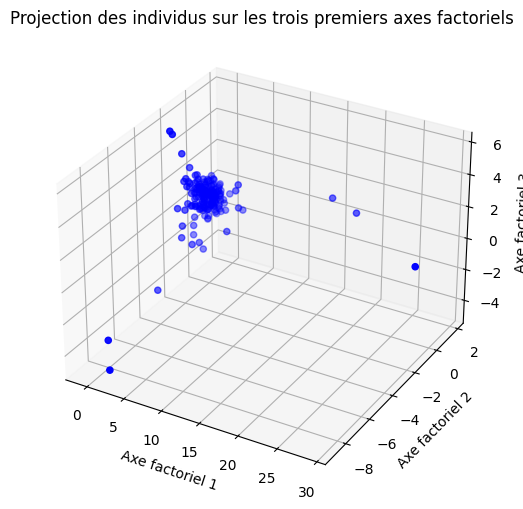

In [ ]:
# Sélection des trois premiers vecteurs propres
selected_eigenvectors = eig_vecs[:, :3]

# Projection des données sur les trois premiers axes
Tp = np.dot(Z, selected_eigenvectors)

# Affichage des coordonnées des individus dans le nouveau repère
print("Coordonnées des individus dans le nouveau repère (Tp) :")
print(Tp)

# Visualisation de la projection des individus sur les trois premiers axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Tp[:, 0], Tp[:, 1], Tp[:, 2], color='blue')
ax.set_xlabel('Axe factoriel 1')
ax.set_ylabel('Axe factoriel 2')
ax.set_zlabel('Axe factoriel 3')
ax.set_title('Projection des individus sur les trois premiers axes factoriels')
plt.show()

# Trace des vecteurs propres correspondant aux trois premiers axes
for i in range(len(X.columns)):
    ax.quiver(0, 0, 0, eig_vecs[i, 0], eig_vecs[i, 1], eig_vecs[i, 2], color='red', arrow_length_ratio=0.1)
    ax.text(eig_vecs[i, 0], eig_vecs[i, 1], eig_vecs[i, 2], X.columns[i], color='red', ha='right')



#ce code effectue une PCA pour réduire la dimensionnalité des données,
#projette les données sur les trois premiers axes principaux
#et visualise les données projetées ainsi que les vecteurs propres associés.
#Cela aide à comprendre la structure des données et les relations entre les variables dans un espace de dimensions réduites.
